### 0必要なライブラリをインポートする

In [46]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
from sympy.physics.quantum.qubit import measure_all, measure_all_oneshot
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP, CGateS
from sympy.physics.quantum.gate import IdentityGate as _I

↓SymPy で良い感じに表示するためのおまじない

In [10]:
# !pip install graphviz
from sympy.printing.dot import dotprint
from graphviz import Source
init_printing()

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy.physics.quantum.circuitplot import CircuitPlot,labeller, Mz,CreateOneQubitGate

## 重ね合わせ状態の中の、ある状態のみマーキングする

重ね合わせ状態の中の、ある状態 $ s_t $ のみに、−１掛ける操作（ここでは、マーキングを呼びます）を考えます。  
  
たとえば、２量子ビットの重ね合わせ状態 $\displaystyle \frac{1}{2} \left(\ |\ 00\ \rangle\ +\ |\ 01\ \rangle\ +\ |\ 10\ \rangle\ +\ |\ 11\ \rangle\ \right) $ を考えるとき、  
状態 $\;|\ 10\ \rangle\;$ をマーキングするとします。   
  
マーキング後の状態は、$\displaystyle  \frac{1}{2} \left(\ |\ 00\ \rangle\ +\ |\ 01\ \rangle\ -\ |\ 10\ \rangle\ +\ |\ 11\ \rangle\ \right) $ となることを目指します。

### ３量子ビットのマーキング操作を試してみましょう

In [25]:
def hadamard(s,n):
    h = H(s)
    for i in range(s+1,n+s):
       h = H(i)*h
    return h
def CCX(c1,c2,t):  return CGateS((c1,c2),X(t))

In [26]:
h_3 = hadamard(0,3)
target_state_3 = qapply(h_3*Qubit('000'))          #３量子ビットの重ね合わせ状態を準備します。
def CCZ(c1,c2,t): return (H(t)*CCX(c1,c2,t)*H(t)) # ＣＣＺ演算子を定義します。

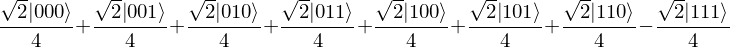

In [27]:
mark_7 = CCZ(1,2,0)
qapply(mark_7*target_state_3)

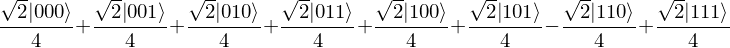

In [28]:
mark_6 = X(0)*CCZ(1,2,0)*X(0)
qapply(mark_6*target_state_3)

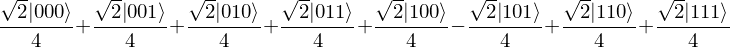

In [29]:
mark_5 = X(1)*CCZ(1,2,0)*X(1)
qapply(mark_5*target_state_3)

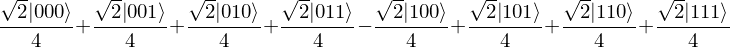

In [30]:
mark_4 = X(1)*X(0)*CCZ(1,2,0)*X(1)*X(0)
qapply(mark_4*target_state_3)

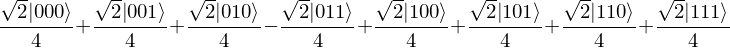

In [31]:
mark_3 = X(2)*CCZ(1,2,0)*X(2)
qapply(mark_3*target_state_3)

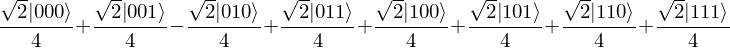

In [32]:
mark_2 = X(2)*X(0)*CCZ(1,2,0)*X(2)*X(0)
qapply(mark_2*target_state_3)

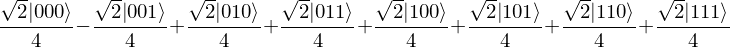

In [33]:
mark_1 = X(2)*X(1)*CCZ(1,2,0)*X(2)*X(1)
qapply(mark_1*target_state_3)

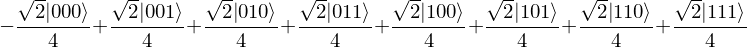

In [34]:
mark_0 = X(2)*X(1)*X(0)*CCZ(1,2,0)*X(2)*X(1)*X(0)
qapply(mark_0*h_3*Qubit('000'))

## 重ね合わせ状態の中に、マーキングした状態があるかを見る
  
著名な操作「Grover のアルゴリズム」を試してみましょう。  

（ヒント１）平均値周りの反転操作：$\displaystyle D_{n} = H_{n} \cdot \Big( 2\ |\ 0\ \rangle\langle\ 0\ |_{n}\ -\ I_{n} \Big) \cdot H_{n} $ を使います。  
  
（ヒント２）試行回数は、$\displaystyle \mathcal{O}(\sqrt{n}) $ 


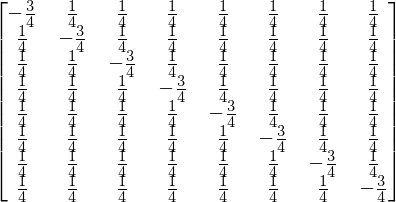

In [35]:
# d_3 = h_3 * X(0)*X(1)*X(2) * H(0)*CCX(1,2,0)*H(0) * X(0)*X(1)*X(2) * h_3    # グローバル位相（絶対位相）の差に注意
# d_3 = h_3 * X(0)*X(1)*X(2) * CGateS((1,2), Z(0)) * X(0)*X(1)*X(2) * h_3
def DOp(n): return (Qubit('0'*n)*QubitBra('0'*n)*2-_I(0))     # ゲート操作で計算するには、上記コメントのような演算になります。
d_3 = h_3 * DOp(3) * h_3    # 平均値周りの反転操作
represent(d_3,nqubits=3)

### ３量子ビットで状態｜７＞を探す

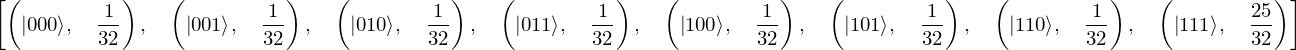

In [40]:
ret1=qapply(d_3*mark_7*target_state_3)
measure_all(ret1)

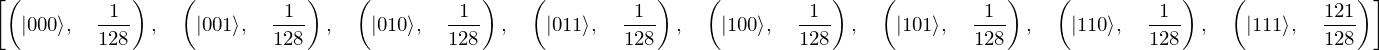

In [41]:
ret2=qapply(d_3*mark_7*ret1)  # シミュレーター計算ですから、上で一度観測した ret1 を使っても観測の影響なく次の計算に利用可能。
measure_all(ret2)

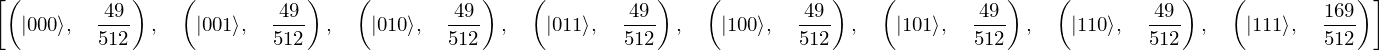

In [42]:
over_1=qapply(d_3*mark_7*ret2)  # 試行回数が多いとどうなるでしょう。
measure_all(over_1)

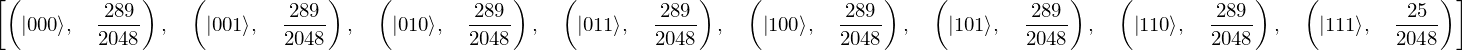

In [43]:
over_2=qapply(d_3*mark_7*over_1)  # 試行回数が多いとどうなるでしょう。
measure_all(over_2)

通しで計算すると、回路が長くなってきています。少し時間かかります。

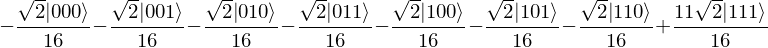

In [44]:
from sympy.physics.quantum.gate import gate_simp
search_7_in_3qubit = gate_simp(d_3*mark_7*d_3*mark_7)
ret3=qapply(search_7_in_3qubit*target_state_3)
ret3

In [47]:
print(measure_all(ret3))
for i in range(10):
    pprint(measure_all_oneshot(ret3))

[(|000>, 1/128), (|001>, 1/128), (|010>, 1/128), (|011>, 1/128), (|100>, 1/128), (|101>, 1/128), (|110>, 1/128), (|111>, 121/128)]
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩


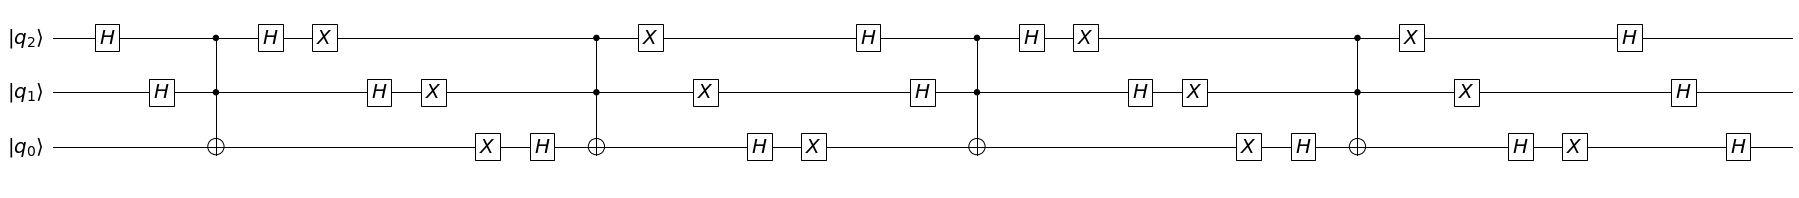

In [48]:
d_3_gate = h_3 * X(0)*X(1)*X(2) * H(0)*CCX(1,2,0)*H(0) * X(0)*X(1)*X(2) * h_3
CircuitPlot(gate_simp(d_3_gate*mark_7*d_3_gate*mark_7*h_3),nqubits=3,labels=labeller(3)[::-1])